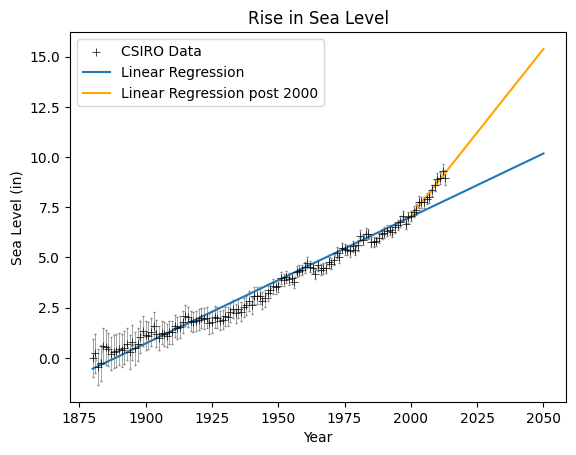

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Read data from file
df = pd.read_csv('epa-sea-level.csv')

# Create scatter plot
fig = plt.figure()
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
upper_bound = df['Upper Error Bound']
lower_bound = df['Lower Error Bound']
plt.scatter(x, y, marker='+', color='black', linewidth=0.5, label='CSIRO Data', zorder=3)
low = abs(y - lower_bound)
high = abs(upper_bound - y)
asym_error = [low, high]
plt.errorbar(df['Year'], df['CSIRO Adjusted Sea Level'], yerr=asym_error, zorder=1, linewidth=0.5, color='grey', ls='--', capsize=1)

# Create first line of best fit
lin_reg = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
m = lin_reg[0]
n = lin_reg[1]
x1 = np.arange(1880,2051,1)
y1 = m*x1 + n
plt.plot(x1, y1, label='Linear Regression')

# Create second line of best fit
df2 = df.loc[df['Year'] >= 2000]
lin_reg2 = linregress(df2['Year'], df2['CSIRO Adjusted Sea Level'])
x2 = np.arange(2000,2051,1)
y2 = lin_reg2[0]*x2 + lin_reg2[1]
plt.plot(x2,y2, label='Linear Regression post 2000', color='orange')

# Add labels and title
plt.ylabel('Sea Level (in)')
plt.xlabel('Year')
plt.title('Rise in Sea Level')
plt.legend()
fig.savefig('linear_regression.png')
